# Importar dados para iniciar análise

In [109]:
# importar pacotes necessários para essa análise:
import pandas as pd
import h2o

In [110]:
# Processo de importação dos dados
df_train = pd.read_csv('train.csv',delimiter=',')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [111]:
# Ver informações das colunas:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [112]:
# Ver quantidade de valores faltantes:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [113]:
# Ver Estatísticas dos dados numéricos:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

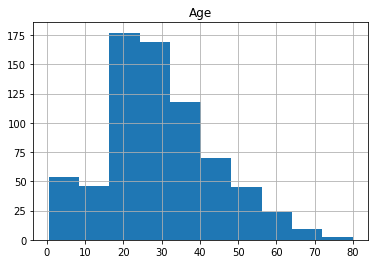

In [114]:
import matplotlib as plt 
# Verificação da distribuição da idade.
df_train[['Age']].hist()


In [115]:
# No caso da idade, os valores faltantes serão substituidos pela mediana.
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [116]:
# As colunas cabin, Name, Ticket e PassengerId serão tiradas
df_train = df_train.drop(columns=['Cabin','Name','Ticket','PassengerId'])
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [117]:
# importar dataset de teste:
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [118]:
df_test = df_test.drop(columns=['Cabin','Name','Ticket','PassengerId'])
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [119]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [120]:
# A idade faltante será substituida pela mediana e o único fare com valor nulo será removido.
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median())
df_test.dropna(inplace=True)
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,27.0,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,27.0,0,0,8.0500,S


In [121]:
df_test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

# Iniciar treinamento do modelo:


In [122]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,7 hours 12 mins
H2O_cluster_timezone:,America/Sao_Paulo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.2
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_engme_tzkqkf
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,346.8 Mb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [123]:
from h2o.automl import H2OAutoML


In [124]:
df_train_h2o = h2o.H2OFrame(df_train)
df_train_h2o

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22,1,0,7.25,S
1,1,female,38,1,0,71.2833,C
1,3,female,26,0,0,7.925,S
1,1,female,35,1,0,53.1,S
0,3,male,35,0,0,8.05,S
0,3,male,28,0,0,8.4583,Q
0,1,male,54,0,0,51.8625,S
0,3,male,2,3,1,21.075,S
1,3,female,27,0,2,11.1333,S
1,2,female,14,1,0,30.0708,C


In [126]:
df_train_h2o['Survived'] = df_train_h2o['Survived'].asfactor()


In [127]:
modelo_automl = H2OAutoML(max_runtime_secs=160,
                          balance_classes=True)
modelo_automl.train(
    x = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'],
    y= 'Survived',
    training_frame= df_train_h2o
)

AutoML progress: |█
23:43:50.660: AutoML: XGBoost is not available; skipping it.

██████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_5_AutoML_4_20220606_234350

No model summary for this model

ModelMetricsBinomial: stackedensemble
** Reported on train data. **

MSE: 0.07958112214616309
RMSE: 0.2821012622200813
LogLoss: 0.28288968309016116
Mean Per-Class Error: 0.10459208129613651
AUC: 0.9268073797121826
AUCPR: 0.9318216125525328
Gini: 0.8536147594243653

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2834279402990315: 


,,0,1,Error,Rate
0,0,508.0,41.0,0.0747,(41.0/549.0)
1,1,46.0,296.0,0.1345,(46.0/342.0)
2,Total,554.0,337.0,0.0976,(87.0/891.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.283428,0.871870,183.0
1,max f2,0.228193,0.879121,201.0
2,max f0point5,0.603199,0.913940,123.0
3,max accuracy,0.296293,0.902357,177.0
4,max precision,0.988854,1.000000,0.0
5,max recall,0.029526,1.000000,384.0
6,max specificity,0.988854,1.000000,0.0
7,max absolute_mcc,0.283428,0.793058,183.0
8,max min_per_class_accuracy,0.228193,0.888889,201.0
9,max mean_per_class_accuracy,0.243515,0.895432,194.0



Gains/Lift Table: Avg response rate: 38,38 %, avg score: 36,04 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010101,0.981037,2.605263,2.605263,1.000000,0.982532,1.000000,0.982532,0.026316,0.026316,160.526316,160.526316,0.026316
1,2,0.020202,0.980266,2.605263,2.605263,1.000000,0.980517,1.000000,0.981525,0.026316,0.052632,160.526316,160.526316,0.052632
2,3,0.040404,0.980249,2.605263,2.605263,1.000000,0.980252,1.000000,0.980888,0.052632,0.105263,160.526316,160.526316,0.105263
3,4,0.040404,0.980115,0.000000,2.605263,0.000000,0.000000,1.000000,0.980888,0.000000,0.105263,-100.000000,160.526316,0.105263
4,5,0.053872,0.979223,2.605263,2.605263,1.000000,0.979480,1.000000,0.980536,0.035088,0.140351,160.526316,160.526316,0.140351
5,6,0.101010,0.968448,2.605263,2.605263,1.000000,0.974209,1.000000,0.977584,0.122807,0.263158,160.526316,160.526316,0.263158
6,7,0.150393,0.944670,2.605263,2.605263,1.000000,0.957204,1.000000,0.970892,0.128655,0.391813,160.526316,160.526316,0.391813
7,8,0.200898,0.917447,2.547368,2.590709,0.977778,0.936307,0.994413,0.962197,0.128655,0.520468,154.736842,159.070862,0.518646
8,9,0.300786,0.585111,2.312537,2.498331,0.887640,0.812361,0.958955,0.912438,0.230994,0.751462,131.253696,149.833071,0.731426
9,10,0.400673,0.230901,1.317268,2.203892,0.505618,0.377430,0.845938,0.779061,0.131579,0.883041,31.726789,120.389208,0.782859




ModelMetricsBinomial: stackedensemble
** Reported on cross-validation data. **

MSE: 0.1274142054541007
RMSE: 0.35695126481650225
LogLoss: 0.4191180820224409
Mean Per-Class Error: 0.17812290288562938
AUC: 0.8794485454681026
AUCPR: 0.8287136338336701
Gini: 0.7588970909362052

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.37201910120017834: 


,,0,1,Error,Rate
0,0,469.0,80.0,0.1457,(80.0/549.0)
1,1,72.0,270.0,0.2105,(72.0/342.0)
2,Total,541.0,350.0,0.1706,(152.0/891.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.372019,0.780347,193.0
1,max f2,0.134354,0.824353,282.0
2,max f0point5,0.678495,0.815946,117.0
3,max accuracy,0.632811,0.830527,126.0
4,max precision,0.973128,0.962963,13.0
5,max recall,0.017971,1.000000,397.0
6,max specificity,0.985163,0.998179,0.0
7,max absolute_mcc,0.372019,0.641042,193.0
8,max min_per_class_accuracy,0.291657,0.815789,216.0
9,max mean_per_class_accuracy,0.372019,0.821877,193.0



Gains/Lift Table: Avg response rate: 38,38 %, avg score: 37,66 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010101,0.980949,2.315789,2.315789,0.888889,0.982201,0.888889,0.982201,0.023392,0.023392,131.578947,131.578947,0.021570
1,2,0.020202,0.979604,2.315789,2.315789,0.888889,0.980159,0.888889,0.981180,0.023392,0.046784,131.578947,131.578947,0.043141
2,3,0.030303,0.978544,2.605263,2.412281,1.000000,0.978827,0.925926,0.980396,0.026316,0.073099,160.526316,141.228070,0.069456
3,4,0.040404,0.976992,2.605263,2.460526,1.000000,0.977902,0.944444,0.979773,0.026316,0.099415,160.526316,146.052632,0.095772
4,5,0.050505,0.974782,2.605263,2.489474,1.000000,0.975787,0.955556,0.978975,0.026316,0.125731,160.526316,148.947368,0.122088
5,6,0.101010,0.962225,2.373684,2.431579,0.911111,0.968115,0.933333,0.973545,0.119883,0.245614,137.368421,143.157895,0.234685
6,7,0.150393,0.936393,2.309211,2.391398,0.886364,0.952440,0.917910,0.966615,0.114035,0.359649,130.921053,139.139827,0.339613
7,8,0.200898,0.896867,2.200000,2.343281,0.844444,0.916524,0.899441,0.954022,0.111111,0.470760,120.000000,134.328139,0.437973
8,9,0.300786,0.608583,1.990538,2.226139,0.764045,0.767478,0.854478,0.892073,0.198830,0.669591,99.053814,122.613904,0.598552
9,10,0.400673,0.351532,1.258723,1.984962,0.483146,0.475628,0.761905,0.788253,0.125731,0.795322,25.872265,98.496241,0.640495




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.830063,0.032010,0.825301,0.831633,0.858757,0.855556,0.779070
1,auc,0.879795,0.033737,0.880055,0.907048,0.885981,0.902967,0.822921
2,err,0.169937,0.032010,0.174699,0.168367,0.141243,0.144444,0.220930
3,err_count,30.200000,5.357238,29.000000,33.000000,25.000000,26.000000,38.000000
4,f0point5,0.763961,0.069169,0.761494,0.780933,0.828402,0.800562,0.648415
5,f1,0.788729,0.050084,0.785185,0.823529,0.817518,0.814286,0.703125
6,f2,0.816952,0.037439,0.810398,0.871041,0.806916,0.828488,0.767918
7,lift_top_group,2.327780,0.446484,2.593750,2.305883,2.528571,2.647059,1.563636
8,logloss,0.420738,0.059977,0.435551,0.386515,0.386385,0.375602,0.519636
9,max_per_class_error,0.200555,0.032389,0.176471,0.225225,0.200000,0.161765,0.239316


In [128]:
best_model = modelo_automl.get_best_model()
best_model

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_5_AutoML_4_20220606_234350

No model summary for this model

ModelMetricsBinomial: stackedensemble
** Reported on train data. **

MSE: 0.07958112214616309
RMSE: 0.2821012622200813
LogLoss: 0.28288968309016116
Mean Per-Class Error: 0.10459208129613651
AUC: 0.9268073797121826
AUCPR: 0.9318216125525328
Gini: 0.8536147594243653

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2834279402990315: 


,,0,1,Error,Rate
0,0,508.0,41.0,0.0747,(41.0/549.0)
1,1,46.0,296.0,0.1345,(46.0/342.0)
2,Total,554.0,337.0,0.0976,(87.0/891.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.283428,0.871870,183.0
1,max f2,0.228193,0.879121,201.0
2,max f0point5,0.603199,0.913940,123.0
3,max accuracy,0.296293,0.902357,177.0
4,max precision,0.988854,1.000000,0.0
5,max recall,0.029526,1.000000,384.0
6,max specificity,0.988854,1.000000,0.0
7,max absolute_mcc,0.283428,0.793058,183.0
8,max min_per_class_accuracy,0.228193,0.888889,201.0
9,max mean_per_class_accuracy,0.243515,0.895432,194.0



Gains/Lift Table: Avg response rate: 38,38 %, avg score: 36,04 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010101,0.981037,2.605263,2.605263,1.000000,0.982532,1.000000,0.982532,0.026316,0.026316,160.526316,160.526316,0.026316
1,2,0.020202,0.980266,2.605263,2.605263,1.000000,0.980517,1.000000,0.981525,0.026316,0.052632,160.526316,160.526316,0.052632
2,3,0.040404,0.980249,2.605263,2.605263,1.000000,0.980252,1.000000,0.980888,0.052632,0.105263,160.526316,160.526316,0.105263
3,4,0.040404,0.980115,0.000000,2.605263,0.000000,0.000000,1.000000,0.980888,0.000000,0.105263,-100.000000,160.526316,0.105263
4,5,0.053872,0.979223,2.605263,2.605263,1.000000,0.979480,1.000000,0.980536,0.035088,0.140351,160.526316,160.526316,0.140351
5,6,0.101010,0.968448,2.605263,2.605263,1.000000,0.974209,1.000000,0.977584,0.122807,0.263158,160.526316,160.526316,0.263158
6,7,0.150393,0.944670,2.605263,2.605263,1.000000,0.957204,1.000000,0.970892,0.128655,0.391813,160.526316,160.526316,0.391813
7,8,0.200898,0.917447,2.547368,2.590709,0.977778,0.936307,0.994413,0.962197,0.128655,0.520468,154.736842,159.070862,0.518646
8,9,0.300786,0.585111,2.312537,2.498331,0.887640,0.812361,0.958955,0.912438,0.230994,0.751462,131.253696,149.833071,0.731426
9,10,0.400673,0.230901,1.317268,2.203892,0.505618,0.377430,0.845938,0.779061,0.131579,0.883041,31.726789,120.389208,0.782859




ModelMetricsBinomial: stackedensemble
** Reported on cross-validation data. **

MSE: 0.1274142054541007
RMSE: 0.35695126481650225
LogLoss: 0.4191180820224409
Mean Per-Class Error: 0.17812290288562938
AUC: 0.8794485454681026
AUCPR: 0.8287136338336701
Gini: 0.7588970909362052

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.37201910120017834: 


,,0,1,Error,Rate
0,0,469.0,80.0,0.1457,(80.0/549.0)
1,1,72.0,270.0,0.2105,(72.0/342.0)
2,Total,541.0,350.0,0.1706,(152.0/891.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.372019,0.780347,193.0
1,max f2,0.134354,0.824353,282.0
2,max f0point5,0.678495,0.815946,117.0
3,max accuracy,0.632811,0.830527,126.0
4,max precision,0.973128,0.962963,13.0
5,max recall,0.017971,1.000000,397.0
6,max specificity,0.985163,0.998179,0.0
7,max absolute_mcc,0.372019,0.641042,193.0
8,max min_per_class_accuracy,0.291657,0.815789,216.0
9,max mean_per_class_accuracy,0.372019,0.821877,193.0



Gains/Lift Table: Avg response rate: 38,38 %, avg score: 37,66 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010101,0.980949,2.315789,2.315789,0.888889,0.982201,0.888889,0.982201,0.023392,0.023392,131.578947,131.578947,0.021570
1,2,0.020202,0.979604,2.315789,2.315789,0.888889,0.980159,0.888889,0.981180,0.023392,0.046784,131.578947,131.578947,0.043141
2,3,0.030303,0.978544,2.605263,2.412281,1.000000,0.978827,0.925926,0.980396,0.026316,0.073099,160.526316,141.228070,0.069456
3,4,0.040404,0.976992,2.605263,2.460526,1.000000,0.977902,0.944444,0.979773,0.026316,0.099415,160.526316,146.052632,0.095772
4,5,0.050505,0.974782,2.605263,2.489474,1.000000,0.975787,0.955556,0.978975,0.026316,0.125731,160.526316,148.947368,0.122088
5,6,0.101010,0.962225,2.373684,2.431579,0.911111,0.968115,0.933333,0.973545,0.119883,0.245614,137.368421,143.157895,0.234685
6,7,0.150393,0.936393,2.309211,2.391398,0.886364,0.952440,0.917910,0.966615,0.114035,0.359649,130.921053,139.139827,0.339613
7,8,0.200898,0.896867,2.200000,2.343281,0.844444,0.916524,0.899441,0.954022,0.111111,0.470760,120.000000,134.328139,0.437973
8,9,0.300786,0.608583,1.990538,2.226139,0.764045,0.767478,0.854478,0.892073,0.198830,0.669591,99.053814,122.613904,0.598552
9,10,0.400673,0.351532,1.258723,1.984962,0.483146,0.475628,0.761905,0.788253,0.125731,0.795322,25.872265,98.496241,0.640495




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.830063,0.032010,0.825301,0.831633,0.858757,0.855556,0.779070
1,auc,0.879795,0.033737,0.880055,0.907048,0.885981,0.902967,0.822921
2,err,0.169937,0.032010,0.174699,0.168367,0.141243,0.144444,0.220930
3,err_count,30.200000,5.357238,29.000000,33.000000,25.000000,26.000000,38.000000
4,f0point5,0.763961,0.069169,0.761494,0.780933,0.828402,0.800562,0.648415
5,f1,0.788729,0.050084,0.785185,0.823529,0.817518,0.814286,0.703125
6,f2,0.816952,0.037439,0.810398,0.871041,0.806916,0.828488,0.767918
7,lift_top_group,2.327780,0.446484,2.593750,2.305883,2.528571,2.647059,1.563636
8,logloss,0.420738,0.059977,0.435551,0.386515,0.386385,0.375602,0.519636
9,max_per_class_error,0.200555,0.032389,0.176471,0.225225,0.200000,0.161765,0.239316


In [129]:
best_model.download_mojo()

'c:\\Users\\engme\\OneDrive\\Área de Trabalho\\Arquivos\\Portfolio\\API-titanic\\StackedEnsemble_AllModels_5_AutoML_4_20220606_234350.zip'

In [130]:
df = pd.DataFrame([
        1,
        'male',
        28,
        1,
        2,
        1,
        'S'
    ]).transpose()
df.columns = [
        'Pclass',
        'Sex',
        'Age',
        'SibSp',
        'Parch',
        'Fare',
        'Embarked'
    ]
imp = h2o.H2OFrame(df)
y = best_model.predict(imp)
y['p0']

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


p0
0.951748


In [131]:
int(y['predict'])

0